In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [2]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters



,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
1,resultsFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,uniqueFilenameString,488nm_0
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackColor,green
9,trackingBildFilename,tracks.bild


In [3]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [4]:
resultsFolder = getInputParameter(inputParameters,"resultsFolder")
trackingCsvFilename = getInputParameter(inputParameters,"trackingCsvFilename")
trackColor = getInputParameter(inputParameters,"trackColor")
trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = float(getInputParameter(inputParameters,"movieLength"))
print(trackColor)

#hack
resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
trackColor = "red"

print(resultsFolder)

green
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/


In [5]:
data = pd.read_csv(resultsFolder+'/'+trackingCsvFilename,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
1,1,70,2,0,2.398080e+02,3.455938e+02,4.452885e+01,2.285881e+04,5.624323e-02,5.640477e-02,5.648089e-02,7.705259e+02
2,1,70,3,121,2.396020e+02,3.457261e+02,4.401741e+01,2.191670e+04,6.825404e-02,6.812530e-02,6.801579e-02,8.966284e+02
3,1,70,4,90,2.400139e+02,3.457024e+02,4.475419e+01,2.231589e+04,5.023574e-02,5.033191e-02,5.030067e-02,6.751585e+02
4,1,70,5,85,2.397104e+02,3.454962e+02,4.467903e+01,2.411560e+04,5.471115e-02,5.492841e-02,5.473449e-02,7.897406e+02


In [6]:
len(data)

136917

In [7]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 156.7659,  156.1968,  156.0595,  157.0998,  156.5786,  156.4271,
        156.5944,  156.5876,  156.5714,  155.5223,  155.3155,  155.9865,
        156.2037,  155.3062,  154.8639,  153.6837,  152.6892,  152.6978,
        152.3586,  153.3598,  151.7224,  152.2676,  153.0374,  152.7137,
        152.4815,  152.053 ,  152.2937,  153.3386,  154.2122,  154.1129,
        153.7602,  154.5101,  155.5344,  155.6745,  155.1898,  154.7901,
        154.6837,  156.1533,  156.4854,  157.1372,  157.1034,  156.7103,
        156.1416,  156.0547,  155.5494,  154.9463,  155.149 ,  155.7653,
        155.9171,  156.7565,  157.3618,  156.3404,  156.5782,  155.2606,
        156.0663,  155.4993,  157.1665,  157.0399,  156.3844,  156.7436,
        156.4877,  155.9891,  155.296 ,  154.4575,  154.4178,  154.2307,
        154.2092,  153.3554,  154.2689,  155.3269])

Text(0,0.5,'amplitude')

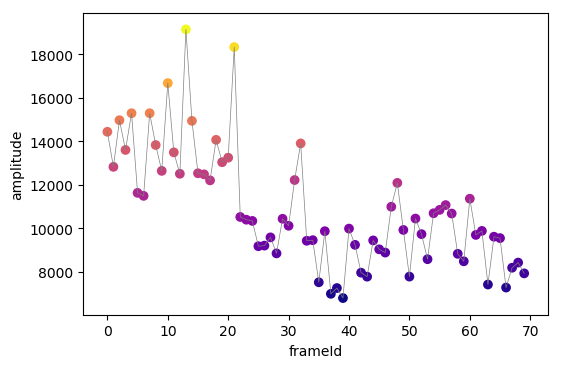

In [8]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


Text(0.5,0,'y [px]')

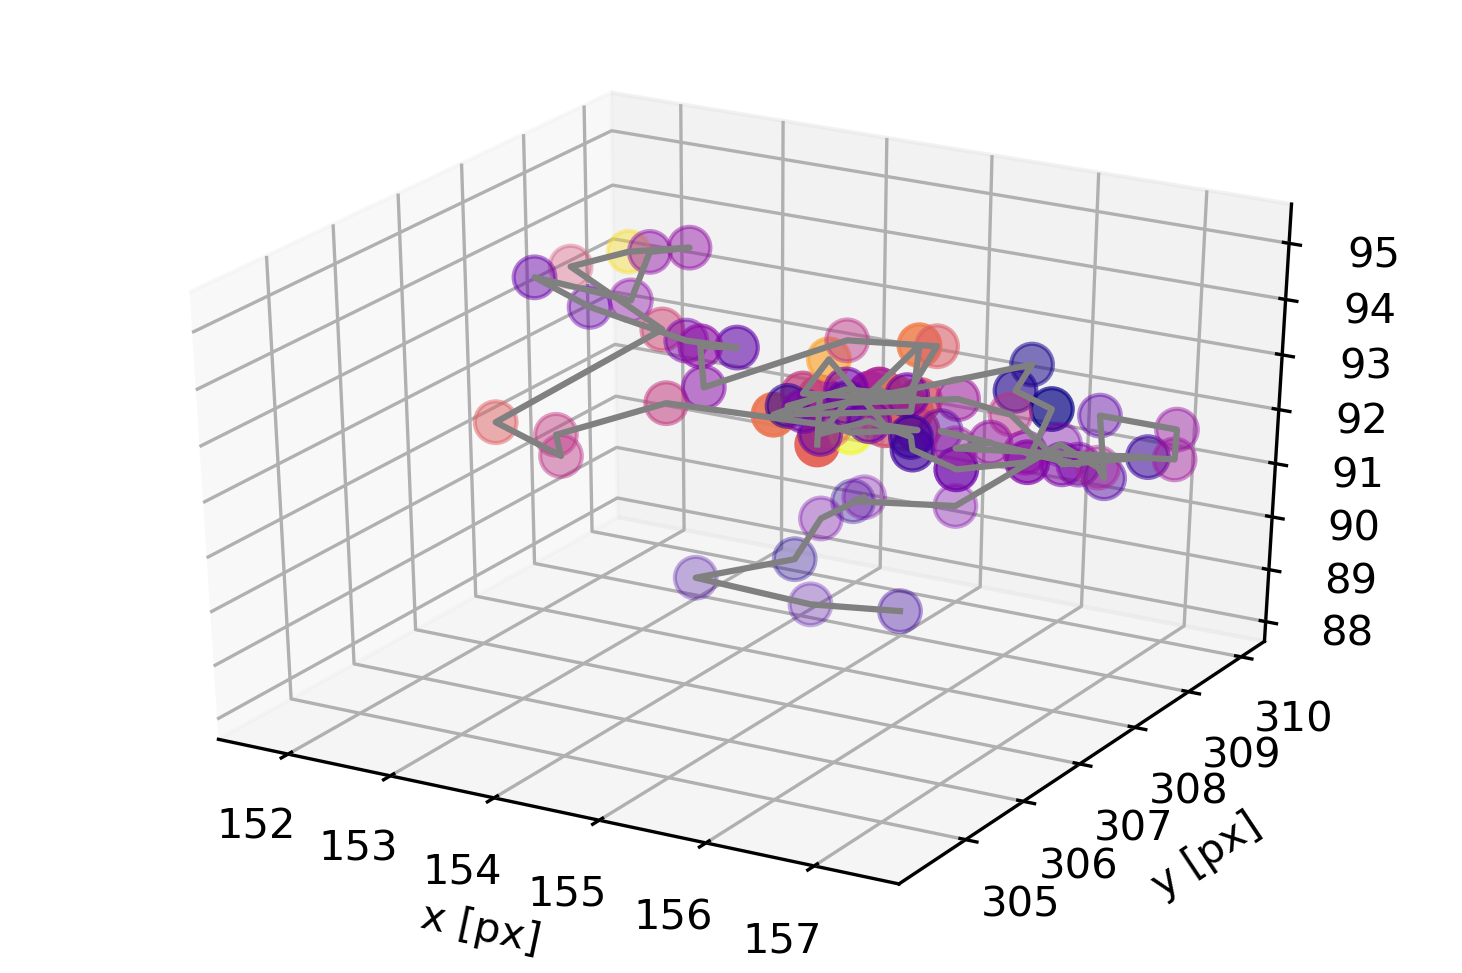

In [9]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)
ax.plot3D(x, y, z, 'grey')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap='plasma',s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.zlabel('z [px]')

In [10]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

In [11]:
longtracks = data[data['tracklength'] >= 10]
print(len(longtracks))
print(len(np.unique(data['trackId'].values)))
print(np.unique(data['trackId'].values))

104676
14655
[    1     2     3 ..., 14653 14654 14655]


Text(0.5,0,'z [px]')

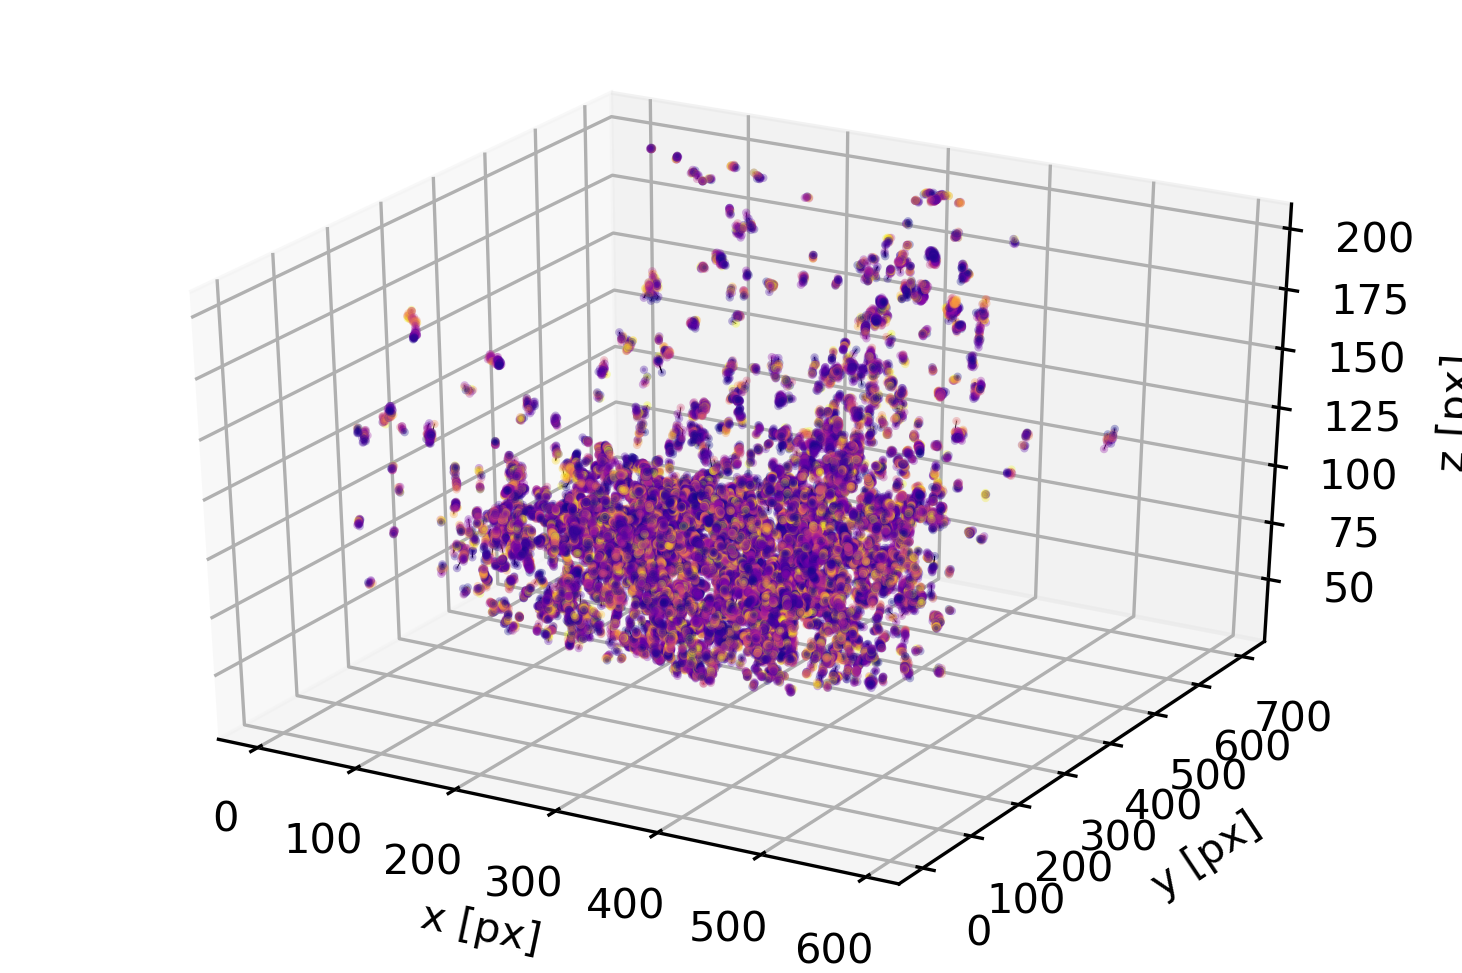

In [16]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_zlabel('z [px]')